## Observations and Insights 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study = pd.merge(mouse_data,study_results,how= "outer",  on ="Mouse ID")


# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [55]:
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [56]:
# Checking the number of mice.
    #drop duplicate mouse ID
mice_number = mouse_study['Mouse ID'].nunique()
mice_number

249

In [57]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = mouse_study[mouse_study.duplicated(["Mouse ID","Timepoint"])]
show_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [58]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID = mouse_study.loc[mouse_study['Mouse ID']=="g989",:]
duplicate_ID
#use loc to get data (row,column)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Checking the number of mice in the clean DataFrame.
clean_df.loc[clean_df['Mouse ID']=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#group by Drug Regimen
drug_groupby = clean_df.groupby(['Drug Regimen'])


In [62]:
#calculate mean of tumor volume
average_tumor = round(drug_groupby['Tumor Volume (mm3)'].mean(),2)

#calculate median of tumor volume
median_tumor = round(drug_groupby['Tumor Volume (mm3)'].median(),2)

#calculate variance of tumor volume
variance_tumor = round(drug_groupby['Tumor Volume (mm3)'].var(),2)

#calculate standard deviation
std_tumor = round(drug_groupby['Tumor Volume (mm3)'].std(),2)

#calculate SEM of tumor volume
sem_tumor = round(drug_groupby['Tumor Volume (mm3)'].sem(),2)

#summary

drug_summarya = pd.DataFrame({"Mean Tumor Volume":average_tumor,
                            "Median Tumor Volume":median_tumor,
                            "Variance Tumor Volume":variance_tumor,
                            "Standard Deviation Tumor Volume":std_tumor,
                            "SEM Tumor Volume":sem_tumor})
drug_summarya



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summaryb = round(drug_groupby["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']),2)
drug_summaryb

#drug_groupby 






,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

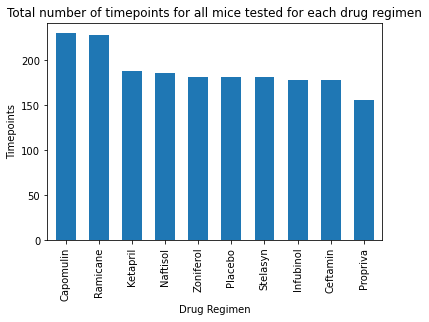

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width=.6)

#Set labels
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel('Timepoints')
bar_plot.set_title('Total number of timepoints for all mice tested for each drug regimen')
plt.show() #to not show details




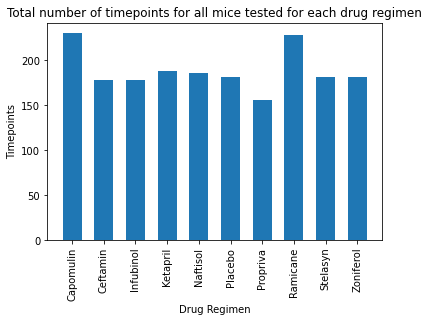

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.





#set x,y axis
y_axis = drug_groupby["Timepoint"].count()
#y_axis #always check before move on to next step. by checking, can see that we can use the index for x_axis
x_axis = y_axis.index



#plot 

plt.bar(x_axis,y_axis,width = .6) #plot
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel('Timepoints')
plt.title('Total number of timepoints for all mice tested for each drug regimen')
plt.show()








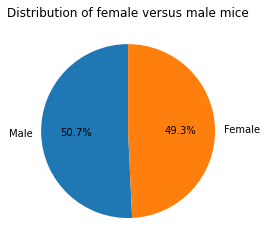

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df['Sex'].value_counts()
#gender_data

pie_plot = gender_data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution of female versus male mice')

#hide the sex label

pie_plot.set_ylabel('')
plt.show()

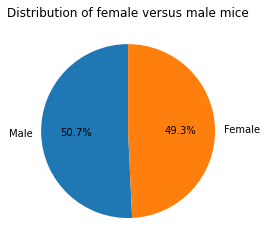

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data #from above

#  create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(gender_data, labels=gender_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution of female versus male mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [68]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_max_timepoint = pd.merge(max_timepoint , clean_df, on=(["Mouse ID","Timepoint"]))
merge_max_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [69]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [70]:
# Put treatments into a list for for loop (and later for plot labels)
 #Capomulin, Ramicane, Infubinol, and Ceftamin
treatments =['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatement_loc = merge_max_timepoint.loc[merge_max_timepoint['Drug Regimen']== treatment,:]
    tumor_vol_per_treatement = treatement_loc['Tumor Volume (mm3)']
    #add tumor volume data in empty list
    tumor_vol_data.append(tumor_vol_per_treatement)

quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3     
       
    # Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")
    

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


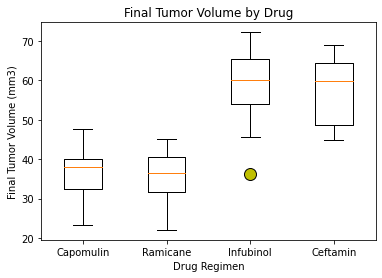

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='y', markersize=12,
                  linestyle='none')

# Plot boxplot
plt.boxplot(tumor_vol_data, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],treatments)
plt.xlabel('Drug Regimen')


plt.show()

## Line and Scatter Plots

## Correlation and Regression

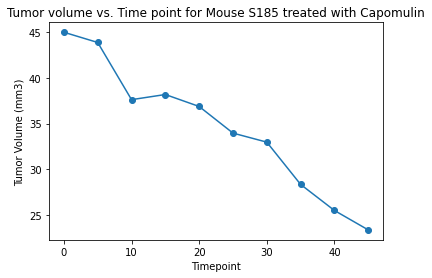

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_drug_only = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_drug_only

#choose number s185

s185 = capomulin_drug_only.loc[capomulin_drug_only['Mouse ID']=='s185',:]
s185

#set x_axis, y_axis

y_axis = s185['Tumor Volume (mm3)']
x_axis = s185['Timepoint']

#plot. marker adds circle on each data point
plt.plot(x_axis,y_axis,marker='o')
plt.title("Tumor volume vs. Time point for Mouse S185 treated with Capomulin")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()









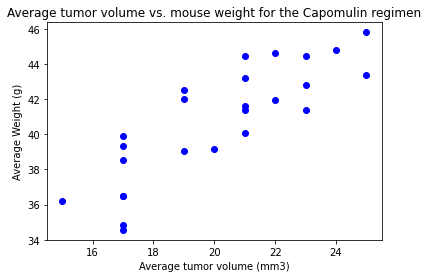

In [73]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_drug_only

mouse_groupby = capomulin_drug_only.groupby(capomulin_drug_only['Mouse ID'])
mean_tumor_vol = mouse_groupby['Tumor Volume (mm3)'].mean()
mean_tumor_vol

mean_weight_vol = mouse_groupby['Weight (g)'].mean()
mean_weight_vol

x_axis_scatter = mean_weight_vol
y_axis_scatter = mean_tumor_vol

plt.scatter(x_axis_scatter,y_axis_scatter,marker="o",color="blue")
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel('Average tumor volume (mm3)')
plt.ylabel('Average Weight (g)')
plt.show()

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


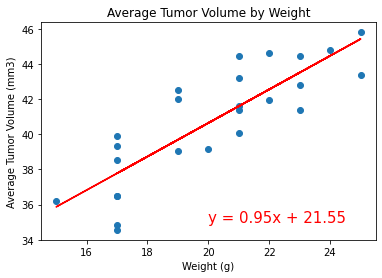

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume. Data is from above
correlation = st.pearsonr(x_axis_scatter,y_axis_scatter)

# Print the result of above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_axis_scatter,y_axis_scatter)
plt.plot(x_axis_scatter,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()